In [8]:
import market as mkt
from datetime import time
sim = mkt.Simulator(code=688017, date=20220704)

In [9]:
sim.reset()
current_time = time(hour=9, minute=15, second=0)
end_time = time(hour=15, minute=0, second=0)
current_time = (current_time.hour * 60 + current_time.minute) * 60 + current_time.second
end_time = (end_time.hour * 60 + end_time.minute) * 60 + end_time.second

while current_time < end_time:
    current_time = sim.next_step()
    current_time = (current_time.hour * 60 + current_time.minute) * 60 + current_time.second
print(sim.order_book)

2022-07-04 15:00:00
     bid_v   bid_p   ask_p   ask_v
0    905.0  122.56  122.55  1619.0
1   5618.0  122.55  122.60  2860.0
2    900.0  122.00  122.79   637.0
3    188.0  121.67  122.80   800.0
4    300.0  121.65  122.86   126.0
5    600.0  121.60  122.87   200.0
6    500.0  121.50  122.89   488.0
7    400.0  121.42  122.90  6542.0
8    400.0  121.41  122.94   425.0
9    500.0  121.40  122.95   600.0
10    32.0  121.25  122.98   700.0


In [10]:
price_series = sim.order_book.historical_deal.set_index('time').resample('3s').last().dropna()
price_series

,price,vol,bid_uid,ask_uid,is_ours,our_direction
time,,,,,,
2022-07-04 09:25:00,122.01,50.0,236471.0,226604.0,False,0.0
2022-07-04 09:30:00,124.01,1111.0,252020.0,269378.0,False,0.0
2022-07-04 09:30:03,124.00,116.0,297718.0,269378.0,False,0.0
2022-07-04 09:30:06,124.99,260.0,318653.0,71437.0,False,0.0
2022-07-04 09:30:09,125.00,1802.0,368941.0,301540.0,False,0.0
...,...,...,...,...,...,...
2022-07-04 14:56:06,122.78,400.0,10780815.0,10557219.0,False,0.0
2022-07-04 14:56:15,122.79,2028.0,10789513.0,10550807.0,False,0.0
2022-07-04 14:56:42,122.79,200.0,10809572.0,10550807.0,False,0.0


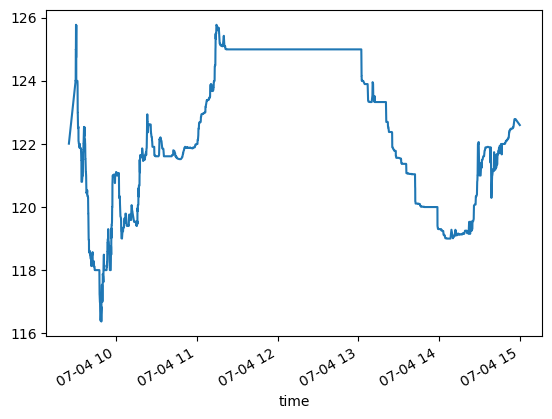

In [11]:
import matplotlib.pyplot as plt
price_series["price"].plot()
plt.show()

In [12]:
from portfolio import Portfolio
sim.reset()
port = Portfolio(cash=10e6, inventory=0)